# **Importação de Bibliotecas básicas para compreensão dos dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pmdarima

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Base de Dados - Receita Tributária Estadual de SP

*Fonte: https://portal.fazenda.sp.gov.br/acessoinformacao/Paginas/Relat%C3%B3rios-da-Receita-Tribut%C3%A1ria.aspx#

In [3]:
SP = pd.read_excel('Receita_SP.xlsx', index_col = 'PERIODO', parse_dates=True)

In [4]:
SP.head()

,ICMS,IPVA,ITCMD,TAXAS,total
PERIODO,,,,,
2004-01-01,3575.1,1445.6,17.6,148.8,5187.1
2004-02-01,3262.9,753.9,15.8,122.1,4154.7
2004-03-01,3469.4,566.5,42.8,146.9,4225.6
2004-04-01,3657.0,146.3,27.4,138.1,3968.7
2004-05-01,3667.4,133.3,29.6,152.8,3983.1


In [5]:
SP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2004-01-01 to 2020-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ICMS    203 non-null    float64
 1   IPVA    203 non-null    float64
 2   ITCMD   203 non-null    float64
 3   TAXAS   203 non-null    float64
 4   total   203 non-null    float64
dtypes: float64(5)
memory usage: 9.5 KB


In [6]:
receitas = [x for x in SP]

---
- Os dados acima nos mostram mês a mês a **Arrecadação das receitas tributárias do Estado de São Paulo, divido por cada Tributo e seu total**.
---
- Neste primeiro momento vamos plotar todos estes dados, para vizualiarmos de maneira melhor, e tirar algumas conclusões

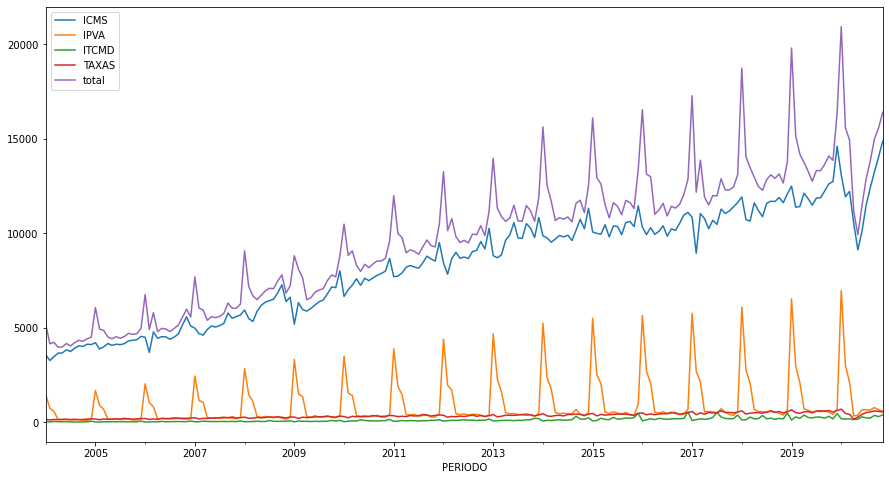

In [7]:
SP.plot(figsize = (15,8));

---

1. A partir do gráfico é possível observar grande predominio na arrecadação de do Estado de São Paulo vem do ICMS e logo na sequência o IPVA (que gera os picos de arrecadação).
---

In [8]:
soma = {}

for i in SP:
  soma[i] = SP[i].sum()

In [9]:
soma

{'ICMS': 1696680.0,
 'IPVA': 189708.70000000004,
 'ITCMD': 25220.6,
 'TAXAS': 70870.0,
 'total': 1982480.3}

In [10]:
soma_pd = pd.DataFrame.from_dict(soma, orient='index', columns=['Soma'])

In [11]:
soma_pd.sort_values(by='Soma', ascending=False).head(6)

,Soma
total,1982480.3
ICMS,1696680.0
IPVA,189708.7
TAXAS,70870.0
ITCMD,25220.6


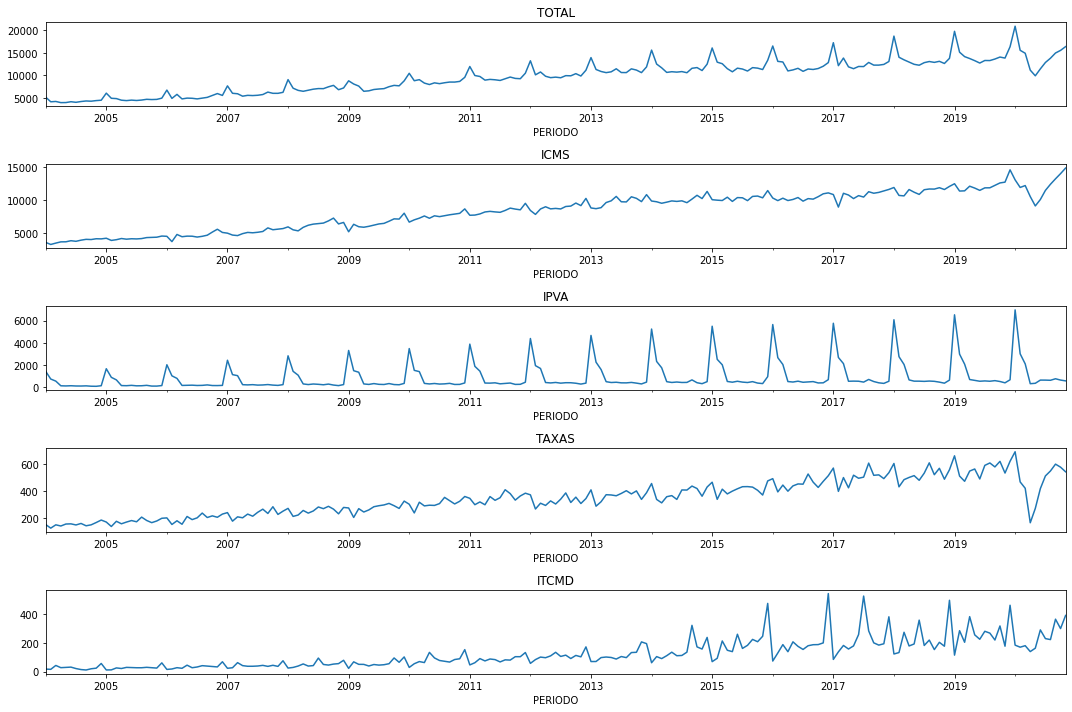

In [12]:
fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,10))
SP['total'].plot(ax=ax1, title='TOTAL')
SP['ICMS'].plot(ax=ax2, title='ICMS')
SP['IPVA'].plot(ax=ax3, title='IPVA')
SP['TAXAS'].plot(ax=ax4, title='TAXAS')
SP['ITCMD'].plot(ax=ax5, title='ITCMD')
plt.tight_layout()

---
- É possível observar uma tendência de aumento da receita tributária estadual.
- Como forma de simplificar os estudos, analisaremos a tendência Geral (soma de todos tributos), que já consta na coluna nomeada como **"total"**.
- Analisaremos também o ICMS, Grande responsável pela arrecadação do Estado.
---

In [13]:
# Fazer uma cópia do dataframe para trabalhar

df = SP.copy()


In [14]:
df.index.freq = 'MS'                  # month start frequency - frequência mensal

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [15]:
df.head()

,ICMS,IPVA,ITCMD,TAXAS,total
PERIODO,,,,,
2004-01-01,3575.1,1445.6,17.6,148.8,5187.1
2004-02-01,3262.9,753.9,15.8,122.1,4154.7
2004-03-01,3469.4,566.5,42.8,146.9,4225.6
2004-04-01,3657.0,146.3,27.4,138.1,3968.7
2004-05-01,3667.4,133.3,29.6,152.8,3983.1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2004-01-01 to 2020-11-01
Freq: MS
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ICMS    203 non-null    float64
 1   IPVA    203 non-null    float64
 2   ITCMD   203 non-null    float64
 3   TAXAS   203 non-null    float64
 4   total   203 non-null    float64
dtypes: float64(5)
memory usage: 9.5 KB


In [17]:
df.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='PERIODO', length=203, freq='MS')

In [18]:
df.tail()

,ICMS,IPVA,ITCMD,TAXAS,total
PERIODO,,,,,
2020-07-01,11478.2,656.6,228.6,511.8,12875.2
2020-08-01,12411.2,642.0,221.8,548.9,13823.9
2020-09-01,13240.2,778.2,363.0,600.0,14981.4
2020-10-01,14027.3,660.2,298.0,577.3,15562.8
2020-11-01,14875.0,589.1,388.8,542.8,16395.6


In [19]:
df.describe()

,ICMS,IPVA,ITCMD,TAXAS,total
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,8358.029557,934.525616,124.239409,349.113300,9765.912808
std,2818.296759,1263.853254,103.617778,133.577133,3537.890161
min,3262.900000,100.700000,11.400000,122.100000,3968.700000
25%,5822.250000,289.700000,44.900000,239.300000,6733.700000
50%,8788.000000,450.900000,94.800000,336.800000,10137.500000
75%,10533.800000,735.450000,178.650000,440.600000,12281.600000
max,14875.000000,6969.100000,540.200000,692.500000,20927.600000


# Plotar os Dados

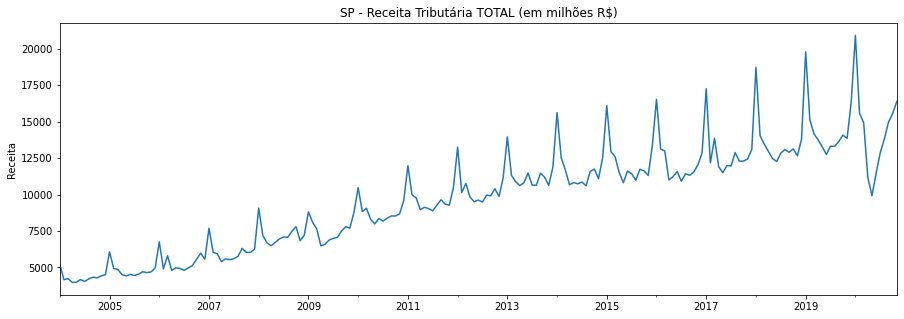

In [20]:
title='SP - Receita Tributária TOTAL (em milhões R$)'
ylabel='Receita'
xlabel='' 

ax = df['total'].plot(figsize=(15,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


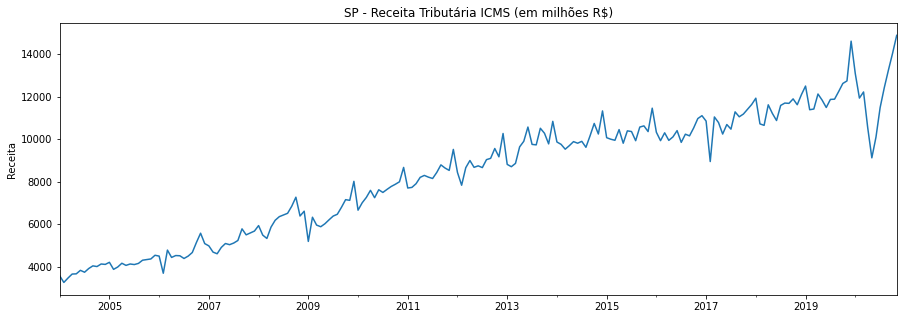

In [21]:
title='SP - Receita Tributária ICMS (em milhões R$)'
ylabel='Receita'
xlabel='' 

ax = df['ICMS'].plot(figsize=(15,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

---
- É possível observar uma tendência nos dois gráficos.
- Possívelmente, pelo fato de que a Arrecadação de São Paulo é fortemente afetada pela arrecadação do ICMS
---

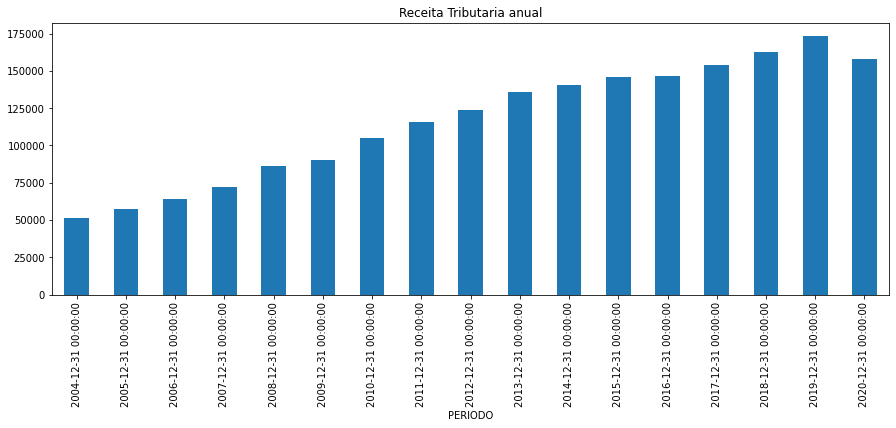

In [22]:
# Variação por ano
df['total'].resample('A').sum().plot.bar(figsize = (15,5),x = df.index, title='Receita Tributaria anual');

---
- **Será inserida uma média de 12 meses, para observar tendência**
---

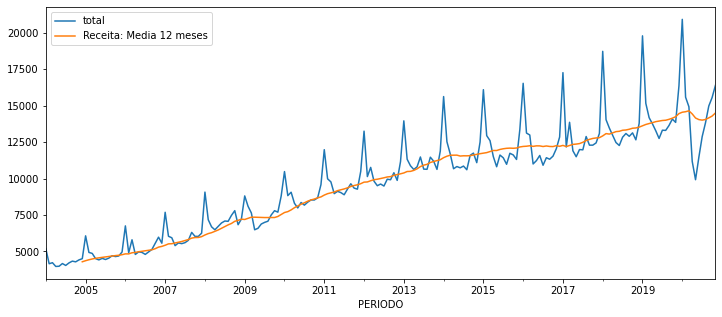

In [23]:
df['Receita: Media 12 meses'] = df['total'].rolling(window=12).mean()
df[['total','Receita: Media 12 meses']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

# Utilizando Statsmodels para obter tendência

O <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'> filtro Hodrick-Prescott </a> separa uma série temporal  $y_t$ em uma componente de tendência $\tau_t$ e uma componente cíclica $c_t$

$y_t = \tau_t + c_t$

Conforme a fonte: https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html

O valor **lamb** a ser utilizado deve ser **129600** para dados mensais.

In [24]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Separando as variáveis
rec_cycle, rec_trend = hpfilter(df['total'], lamb=129600)

In [25]:
df['trend'] = rec_trend

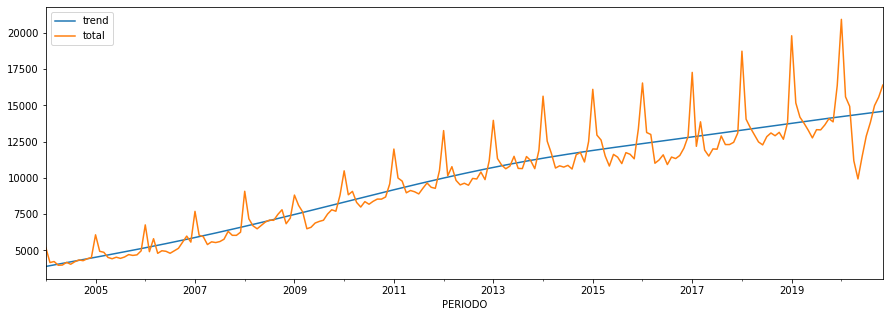

In [26]:
df[['trend','total']].plot(figsize = (15,5)).autoscale(axis='x',tight=True);

## ETS

## Error / Trend / Seasonality Models

A <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposição</a> de uma série temporal tenta isolar componentes insividuais como <em>erro</em>, <em>tendência</em>, and <em>sazonalidade</em> (ETS).



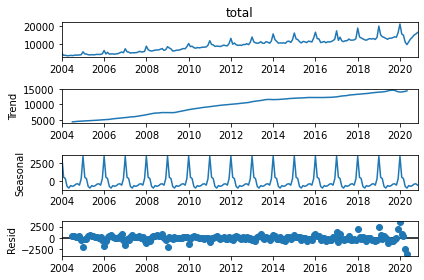

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df['total'], model='add')
resultado.plot();

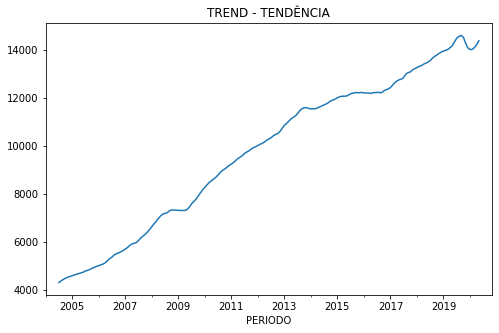

In [28]:
resultado.trend.plot(title='TREND - TENDÊNCIA', figsize=(8,5));

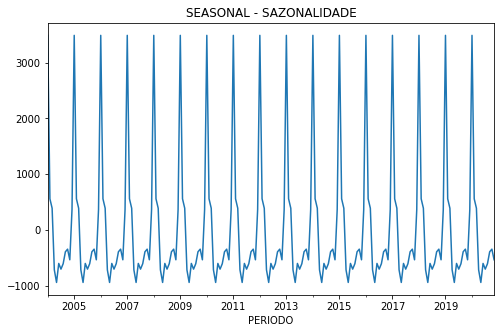

In [29]:
resultado.seasonal.plot(title='SEASONAL - SAZONALIDADE', figsize=(8,5));

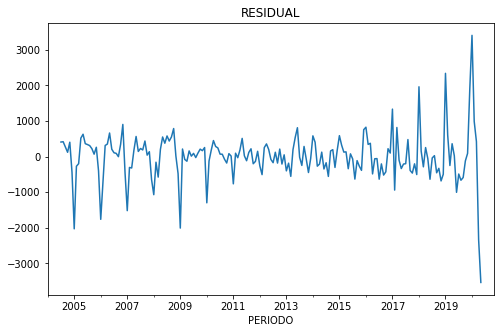

In [30]:
resultado.resid.plot(title='RESIDUAL', figsize=(8,5));

# Holt-Winters Methods

- *Fonte: https://otexts.com/fpp2/holt-winters.html*
- Método Holt-Winters lida com casos de sazonalidade.
- Possui três equações:
  - uma para ajuste de nível
  - outra para ajuste do crescimento
  - outra para sazonalidade

---
Divisão dos dados
---


In [31]:
train = df.loc[:'2016-12-01']
test = df.loc['2017-01-01':]

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['total'],trend='add',seasonal='add',seasonal_periods=12).fit()

In [33]:
test_predictions = fitted_model.forecast(47).rename('Previsão - Holt-Winters - SP')

In [34]:
test_predictions

2017-01-01    16313.258789
2017-02-01    12965.400096
2017-03-01    12664.358017
2017-04-01    11144.574542
2017-05-01    11276.319094
2017-06-01    11792.376250
2017-07-01    11435.035541
2017-08-01    11695.506526
2017-09-01    12033.678837
2017-10-01    12271.472866
2017-11-01    12385.763185
2017-12-01    13758.165560
2018-01-01    16915.030555
2018-02-01    13567.171863
2018-03-01    13266.129783
2018-04-01    11746.346309
2018-05-01    11878.090860
2018-06-01    12394.148016
2018-07-01    12036.807307
2018-08-01    12297.278293
2018-09-01    12635.450604
2018-10-01    12873.244632
2018-11-01    12987.534951
2018-12-01    14359.937326
2019-01-01    17516.802322
2019-02-01    14168.943629
2019-03-01    13867.901550
2019-04-01    12348.118075
2019-05-01    12479.862627
2019-06-01    12995.919782
2019-07-01    12638.579073
2019-08-01    12899.050059
2019-09-01    13237.222370
2019-10-01    13475.016398
2019-11-01    13589.306718
2019-12-01    14961.709092
2020-01-01    18118.574088
2

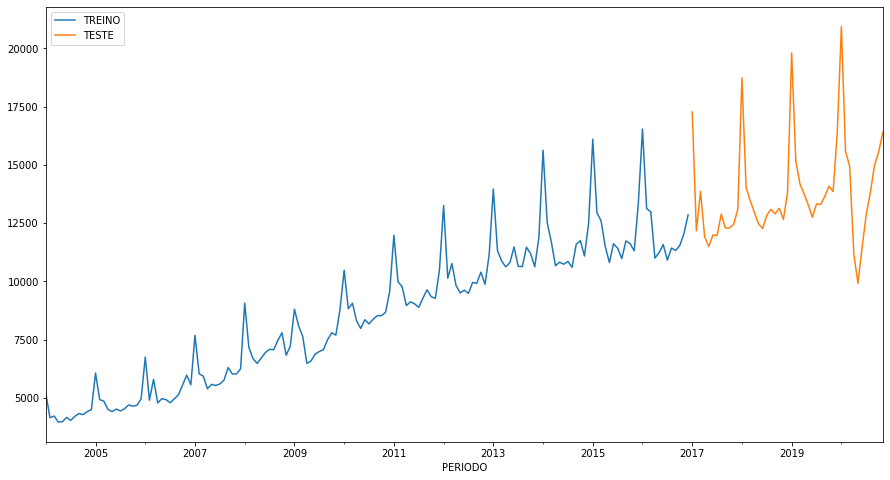

In [35]:
train['total'].plot(legend=True,label='TREINO')
test['total'].plot(legend=True,label='TESTE',figsize=(15,8));

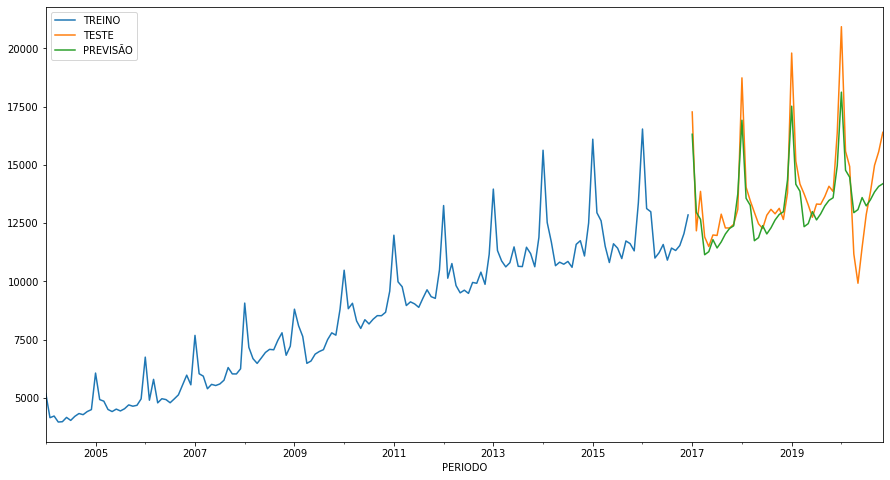

In [36]:
train['total'].plot(legend=True,label='TREINO')
test['total'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions.plot(legend=True,label='PREVISÃO');

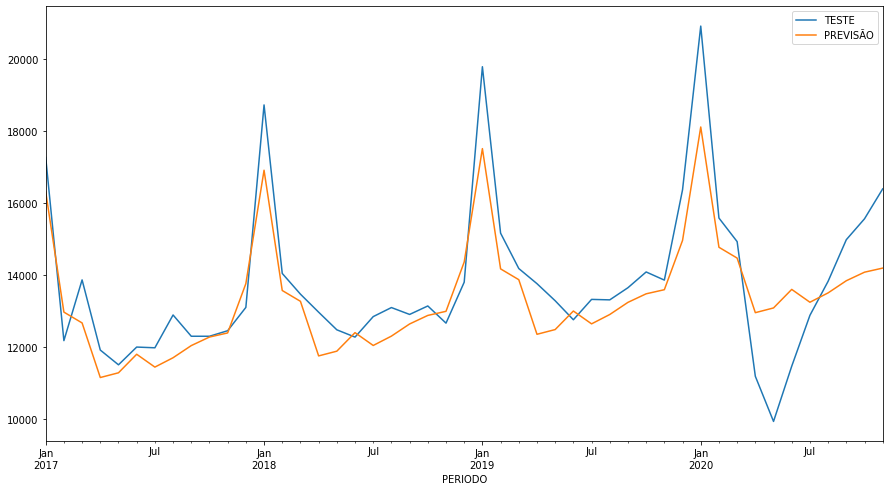

In [37]:
test['total'].plot(legend=True,label='TESTE',figsize=(15,8))
test_predictions.plot(legend=True,label='PREVISÃO',xlim=['2017-01-01','2020-11-01']);

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mean_absolute_error(test['total'],test_predictions)

868.2068336290454

In [40]:
mean_squared_error(test['total'],test_predictions)

1284943.0136480625

In [41]:
np.sqrt(mean_squared_error(test['total'],test_predictions))

1133.5532689944757

### Comparando Dados: **ICMS**

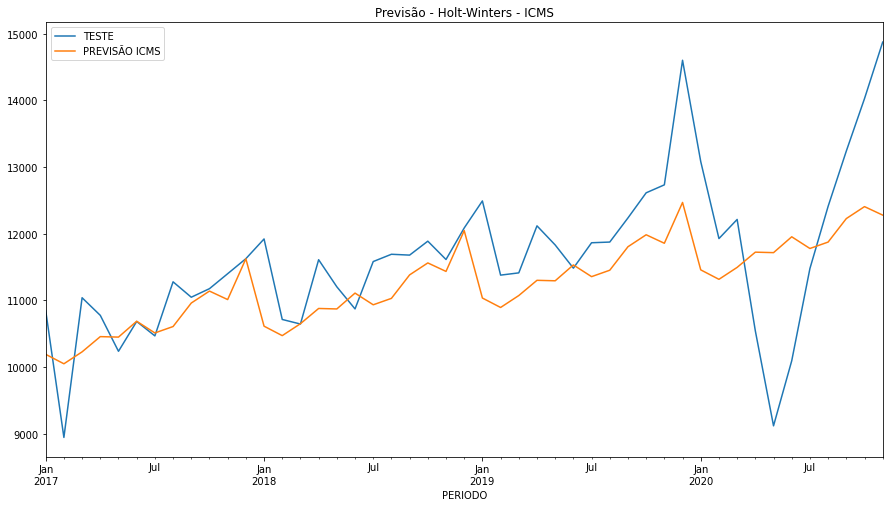

In [42]:
fitted_model_ICMS = ExponentialSmoothing(train['ICMS'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_ICMS = fitted_model_ICMS.forecast(47).rename('Previsão - Holt-Winters - ICMS')
test['ICMS'].plot(legend=True,label='TESTE',figsize=(15,8), title = 'Previsão - Holt-Winters - ICMS')
test_predictions_ICMS.plot(legend=True,label='PREVISÃO ICMS',xlim=['2017-01-01','2020-11-01']);

# Prevendo Futuro - "Holt-Winters"

In [43]:
modelo_HW_final = ExponentialSmoothing(df['total'],trend='add',seasonal='add',seasonal_periods=24).fit()

In [44]:
predição_HW = modelo_HW_final.forecast(36)

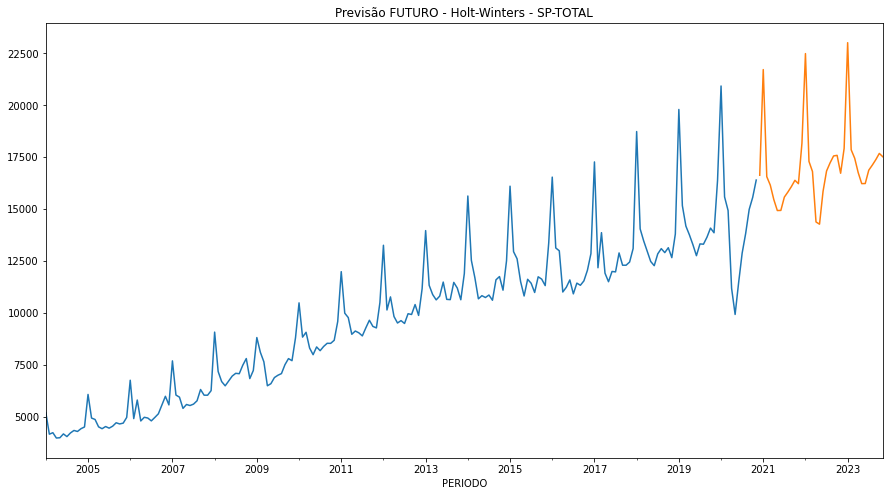

In [45]:
df['total'].plot(figsize=(15,8), title = 'Previsão FUTURO - Holt-Winters - SP-TOTAL')
predição_HW.plot();

### Previsão HOLT-WINTERS: **ICMS**

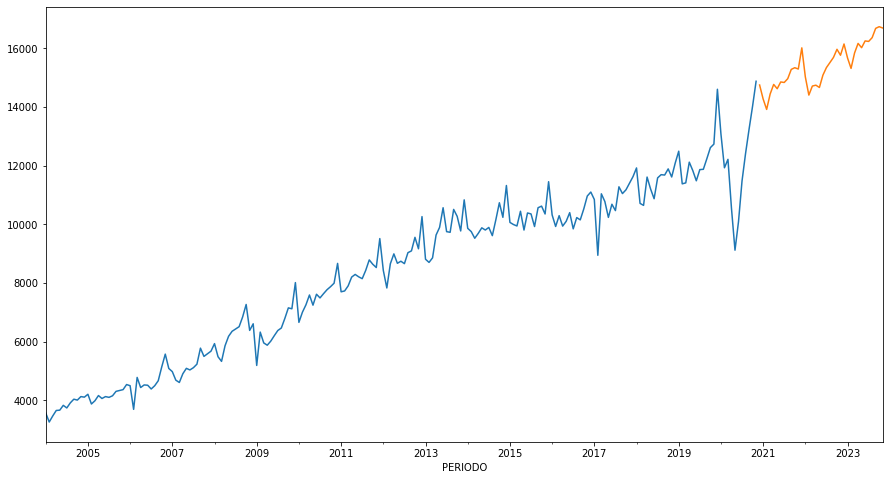

In [46]:
modelo_HW_final_ICMS = ExponentialSmoothing(df['ICMS'],trend='add',seasonal='add',seasonal_periods=24).fit()
predição_HW_ICMS = modelo_HW_final_ICMS.forecast(36)
df['ICMS'].plot(figsize=(15,8))
predição_HW_ICMS.plot();

# **SARIMA**

## Automatizar o teste de  Dickey-Fuller Test Aumentado

- Código extraído do curso "Python for Time Series Data Analysis" - Jose Portilla

In [47]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Passar uma série temporal e um titulo opcional, retorna um relatório ADF
    """
    print(f'Teste de Dickey-Fuller Aumentado: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() para lidar com diferentes dados
    
    labels = ['ADF teste estatístico','p-value','# lags used','# observações']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'valor crítico ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Fortes evidências contra a hipótese nula")
        print("Rejeita a hipótese nula")
        print("É estacionário")
    else:
        print("Fracas evidências contra a hipótese nula")
        print("Falha ao rejeitar a hipótese nula")
        print("É não-estacionária")

In [48]:
adf_test(df['total'])

Teste de Dickey-Fuller Aumentado: 
ADF teste estatístico     -1.083664
p-value                    0.721542
# lags used               15.000000
# observações            187.000000
valor crítico (1%)        -3.465812
valor crítico (5%)        -2.877123
valor crítico (10%)       -2.575077
Fracas evidências contra a hipótese nula
Falha ao rejeitar a hipótese nula
É não-estacionária


In [49]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

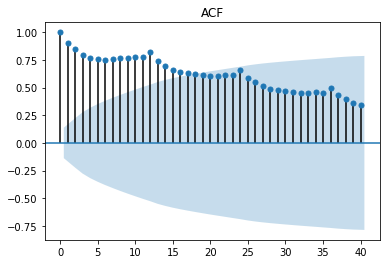

In [50]:
plot_acf(df['total'],title='ACF',lags=40);

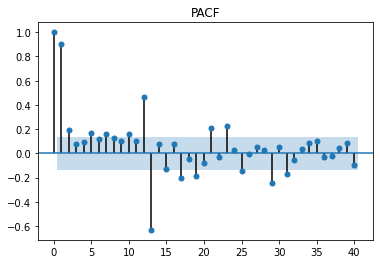

In [51]:
plot_pacf(df['total'],title='PACF',lags=40);

---
- Neste projeto vamos optar por utilizar o Auto-Arima para partir de um modelo e melhorar se houver necessidade a partir do sugerido automaticamente.
---

### **AUTO-ARIMA**
### Rodar <tt>pmdarima.auto_arima</tt> para obter as ordens recomendadas

In [52]:
!pip install pmdarima

In [53]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

In [54]:
auto_arima(df['total'],seasonal=True,m=12).summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  203
Model:             SARIMAX(2, 0, 3)x(2, 1, [], 12)   Log Likelihood               -1473.355
Date:                             Wed, 27 Jan 2021   AIC                           2964.711
Time:                                     00:48:24   BIC                           2993.981
Sample:                                          0   HQIC                          2976.567
                                             - 203                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    364.8409    134.020      2.722      0.006     102.166     627.515
ar.L1          1.2985      0.238      5.455      0.000       0.832       1.765
ar.L2         -0.6926      0.172     -4.029      0.000      -1.030      -0.356
ma.L1         -0.7895      0.246     -3.209      0.001      -1.272      -0.307
ma.L2          0.3930      0.108      3.630      0.000       0.181       0.605
ma.L3          0.2053      0.121      1.691      0.091      -0.033       0.443
ar.S.L12      -0.2334      0.095     -2.462      0.014      -0.419      -0.048
ar.S.L24      -0.1610      0.093     -1.729      0.084      -0.344       0.022
sigma2      2.871e+05   2.17e+04     13.207      0.000    2.45e+05     3.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               256.78
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.48   Skew:                            -1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Ajustar modelo SARIMA(2,0,3)(2,1,0,12)

In [55]:
model_sarima = SARIMAX(train['total'],order=(2,0,3),seasonal_order=(2,1,0,12))
results_sarima = model_sarima.fit()
results_sarima.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  156
Model:             SARIMAX(2, 0, 3)x(2, 1, [], 12)   Log Likelihood               -1067.247
Date:                             Wed, 27 Jan 2021   AIC                           2150.494
Time:                                     00:48:28   BIC                           2174.253
Sample:                                 01-01-2004   HQIC                          2160.149
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8389      0.133     13.834      0.000       1.578       2.099
ar.L2         -0.8393      0.132     -6.348      0.000      -1.098      -0.580
ma.L1         -1.4603      0.156     -9.378      0.000      -1.766      -1.155
ma.L2          0.4311      0.164      2.625      0.009       0.109       0.753
ma.L3          0.0372      0.125      0.299      0.765      -0.207       0.281
ar.S.L12      -0.4196      0.099     -4.253      0.000      -0.613      -0.226
ar.S.L24      -0.1254      0.089     -1.410      0.158      -0.300       0.049
sigma2      1.666e+05   5.87e-07   2.84e+11      0.000    1.67e+05    1.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.89   Prob(JB):                         0.84
Heteroskedasticity (H):               2.06   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.68e+27. Standard errors may be unstable.
"""

In [56]:
# Obtendo a previsão
inicio = len(train)
fim = len(train)+len(test)-1
predictions_sarima = results_sarima.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('SARIMA(2,0,3)(2,1,0,12)')

In [57]:
# Comparando a previsão com os valores esperados
for i in range(len(predictions_sarima)):
    print(f"predicted={predictions_sarima[i]:<11.10}, expected={test['total'][i]}")

predicted=16641.67492, expected=17269.8
predicted=13438.11685, expected=12171.3
predicted=13207.73814, expected=13862.3
predicted=11650.56091, expected=11909.5
predicted=11635.21778, expected=11498.5
predicted=12097.83491, expected=11992.5
predicted=11693.58141, expected=11972.4
predicted=11853.01   , expected=12885.7
predicted=12156.84866, expected=12293.5
predicted=12280.96993, expected=12293.3
predicted=12414.3669 , expected=12447.5
predicted=13674.28432, expected=13096.3
predicted=17264.65707, expected=18732.9
predicted=14011.99163, expected=14042.4
predicted=13800.53172, expected=13465.4
predicted=12179.10382, expected=12963.5
predicted=12153.19248, expected=12472.8
predicted=12629.01388, expected=12269.9
predicted=12174.76768, expected=12840.3
predicted=12364.68471, expected=13092.2
predicted=12606.04346, expected=12900.8
predicted=12726.40578, expected=13136.5
predicted=12914.30269, expected=12658.6
predicted=14139.91533, expected=13798.4
predicted=17735.40798, expected=19796.5


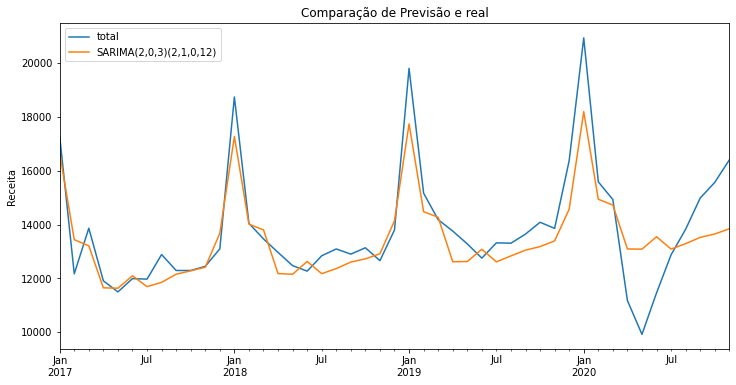

In [58]:
# Plotar previsões em relação aos valores conhecidos
title = 'Comparação de Previsão e real'
ylabel='Receita'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# **Prevendo o futuro com SARIMA**

In [59]:
modelo_final_sarima = SARIMAX(df['total'],order=(2,0,3),seasonal_order=(2,1,0,12))
resultado_final_sarima = modelo_final_sarima.fit()
previsao_final_sarima = resultado_final_sarima.predict(len(df),len(df)+36,typ='levels').rename('SARIMA(2,0,3)(2,1,0,12) Previsão TOTAL')

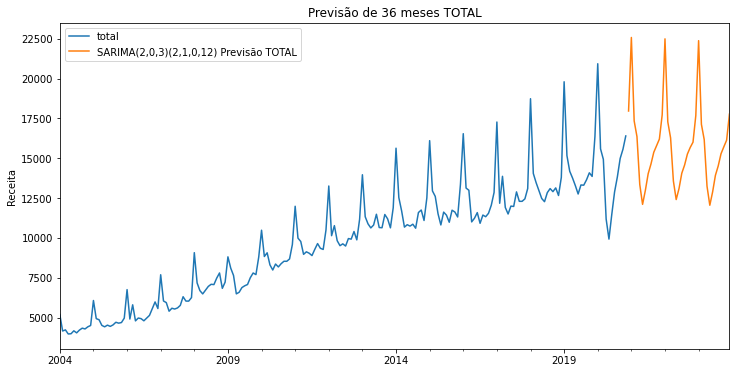

In [60]:
# Plotar previsões de 36 meses para frente
title = 'Previsão de 36 meses TOTAL'
ylabel='Receita'
xlabel=''

ax = df['total'].plot(legend=True,figsize=(12,6),title=title)
previsao_final_sarima.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Prevendo futuro com SARIMA: **ICMS**

In [61]:
auto_arima(df['ICMS'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  203
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1530.217
Date:                            Wed, 27 Jan 2021   AIC                           3072.434
Time:                                    00:49:21   BIC                           3092.283
Sample:                                         0   HQIC                          3080.465
                                            - 203                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8729      2.182      1.775      0.076      -0.403       8.149
ar.L1          0.5838      0.045     13.080      0.000       0.496       0.671
ma.L1         -0.9686      0.020    -49.011      0.000      -1.007      -0.930
ar.S.L12       0.8009      0.106      7.534      0.000       0.593       1.009
ma.S.L12      -0.4326      0.156     -2.773      0.006      -0.738      -0.127
sigma2      2.134e+05   1.34e+04     15.922      0.000    1.87e+05     2.4e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):               207.64
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               3.70   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prevendo futuro com SARIMA: **ICMS**

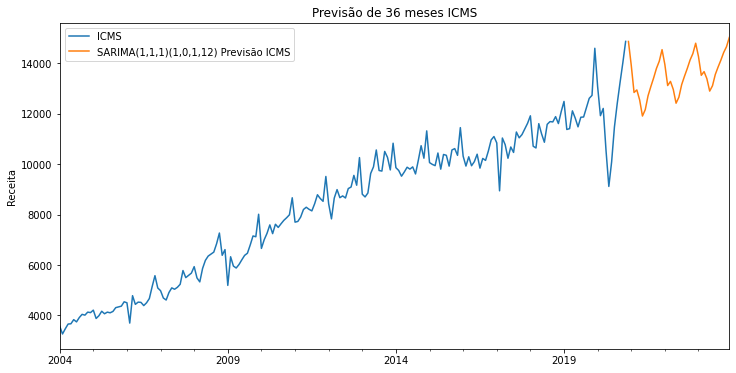

In [62]:
modelo_final_sarima_ICMS = SARIMAX(df['ICMS'],order=(1,1,1),seasonal_order=(1,0,1,12))
resultado_final_sarima_ICMS = modelo_final_sarima_ICMS.fit()
previsao_final_sarima_ICMS = resultado_final_sarima_ICMS.predict(len(df),len(df)+36,typ='levels').rename('SARIMA(1,1,1)(1,0,1,12) Previsão ICMS')

# Plotar previsões de 36 meses para frente
title = 'Previsão de 36 meses ICMS'
ylabel='Receita'
xlabel=''

ax = df['ICMS'].plot(legend=True,figsize=(12,6),title=title)
previsao_final_sarima_ICMS.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);